# Capstone Project: The Battle of Neighbourhoods¶

## CLUSTERING ANALYSIS TO OPEN A SUPERMARKET BUSINESS IN LONDON

## 1. Introduction/Business Understanding

### 1.1 Description of the problem

>Our client wants to open a supermarket in London. London is a competitive market and our customer would like to take into account the distribution of supermarkets and other commercial venues in the area to decide best place to open a supermarket. They also would like to see additional information about population and earnings by borough for London but this is a secondary data to look into in case of indecision between two options. 

### 1.2 Discussion of the background
>London is one of the largest cities of Europe and it is capital of United Kingdom. The population is more than 9 million. Moreover, it is really attractive destinations for tourists with nearly 21 million visitors per year. When we consider its diversity, it is obvious that supermarket business with offering great range of products from all around the world is good idea.  This analysis is aiming to help deciding the location of supermarket to optimize the revenue.

### 1.3 Target Audience
>The aim of this analysis is to recommend the perfect location for opening a supermarket in London for our client AAA Company. 

### Success Criteria
>This project will be considered as successful, if it could provide distribution of supermarkets and other commercials in London area, with given the information about the population and average earnings in same area. 


## 2. Data
* __Scrapped Wikipedia__: List of areas of London to get information about London boroughs, their locations and postal codes.
* Foursquare API to extract venue information about like café, restaurants, supermarkets etc in borough in London. 
* The population of the boroughs of Greater London from citypopulation.de
* Earnings by Place of Residence, Borough  in London from https://data.london.gov.uk/dataset/earnings-place-residence-borough


> __Import necessary libraries__  
>__Scrapped data from Wikipedia__

In [3]:
import numpy as np # library to handle data 

import pandas as pd # library for data analsysis

import requests 



url="https://en.wikipedia.org/wiki/List_of_areas_of_London"
data_url=requests.get(url).text
#parse data from the html 
df, = pd.read_html(data_url, match="Location", skiprows=None)
df.head()

#create columns
columns=["Location", "Borough", "Post town", "PostalCode", "Dial code", "OS grid ref"]

df.columns=columns
#delete unrelevant columns
df2=df.drop(["Dial code", "OS grid ref"], axis=1)
df2['Borough'] = df2['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))
df3 = df2.drop('PostalCode', axis=1).join(df['PostalCode'].str.split(',', expand=True)
                                       .stack().reset_index(level=1, drop=True).rename('PostalCode'))
df4 = df3.reset_index(drop=True)
#delete not assigned 
df4 = df4[df4["Post town"] == "LONDON"].reset_index(drop=True)

df4.head()

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

from geopy.geocoders import Nominatim

#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London is {}, {}.'.format(latitude, longitude))



The geograpical coordinates of London is 51.5073219, -0.1276474.


__Convert an address into latitude and longitude values__

In [4]:
import geocoder
'''Geocoder starts here'''
'''Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

postal_codes = df4['PostalCode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]


In [5]:
len(coordinates)

356

In [6]:
# This will store the London dataframe with coordinates
df_loc = df4

# The obtained latitude and longitude are merged with the dataframe 
df_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_loc['Latitude'] = df_coordinates['Latitude']
df_loc['Longitude'] = df_coordinates['Longitude']
df_loc.head()

,Location,Borough,Post town,PostalCode,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,W3,51.51324,-0.26746
2,Acton,"Ealing, Hammersmith and Fulham",LONDON,W4,51.48944,-0.26194
3,Aldgate,City,LONDON,EC3,51.51200,-0.08058
4,Aldwych,Westminster,LONDON,WC2,51.51651,-0.11968


> __The coordinates of London City and creating a map of London City with boroughs__

In [7]:
import folium
print('The geograpical coordinate of "London" are: {}, {}.'.format(latitude, longitude))
# create map of Vienna using latitude and longitude values
map_London = folium.Map(location=[latitude,longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_loc['Latitude'], df_loc['Longitude']
                                          , df_loc['Borough']):
    
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
   
map_London

The geograpical coordinate of "London" are: 51.5073219, -0.1276474.


__Using the Foursquare API to explore the neighborhoods__ 

In [277]:
# @hidden_cell
CLIENT_ID = 'hidden' # your Foursquare ID
CLIENT_SECRET = 'hidden' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: hidden
CLIENT_SECRET:hidden


## 3. Methodology
### Business Understanding
>Our primary aim is to find optimum location for supermarket investmen in London area for our client AAA Company which is a large global chain in retail sector.  
__Exploratory data analysis__  
>London is mainly consisting of 32 boroughs and geopy and folium libraries are used to crerate a map to visualize boroughs of London.  
__Problem approach__
* The analysis started with scrapping Wikipedia page List of areas of London to get information about London boroughs.  From this page, data frame is constructed with following information: Location, Borough, Post town, Postal Code.
* Latitude and longitude value values of boroughs are extracted from geopy library. That information is added into our initial data frame.
* Foursquare API is used to do segmentation and exploration. Firstly, all venues information for given latitude and longitude values is obtained by Foursquare. 
* One hot encoding is used to see borough distribution all kind of commercials. Data is grouped by borough to determine the frequency of each of them for given location.
* K-means clustering is applied to see the pattern and get the information about the top ten common place for each borough.  Best value of k value is obtained by silhouette_score from sklearn.metrics. It is observed that k=3 would yield the better results.  


__Creating a dataframe with the venues information provided by foursquare for the given coordinates__


In [19]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough in zip(df_loc['Latitude'], df_loc['Longitude'], df_loc['PostalCode']
                                                  , df_loc['Borough']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
        venues.append((
            post, 
            borough,
            lat, 
            long,
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['PostalCode', 'Borough', 'BoroughLatitude', 'BoroughLongitude',
                     'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)


(12411, 8)


In [20]:
venues_df.head(20)

,PostalCode,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,SE2,"Bexley, Greenwich",51.49245,0.12127,Lesnes Abbey,51.489526,0.125839,Historic Site
1,SE2,"Bexley, Greenwich",51.49245,0.12127,Sainsbury's,51.492824,0.120724,Supermarket
2,SE2,"Bexley, Greenwich",51.49245,0.12127,Lidl,51.496152,0.118417,Supermarket
3,SE2,"Bexley, Greenwich",51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
4,SE2,"Bexley, Greenwich",51.49245,0.12127,Platform 1,51.491023,0.119491,Platform
5,SE2,"Bexley, Greenwich",51.49245,0.12127,Costcutter,51.491287,0.120938,Convenience Store
6,SE2,"Bexley, Greenwich",51.49245,0.12127,Bean @ Work,51.491172,0.120649,Coffee Shop
7,W3,"Ealing, Hammersmith and Fulham",51.51324,-0.26746,Sainsbury's Local,51.515025,-0.268968,Grocery Store
8,W3,"Ealing, Hammersmith and Fulham",51.51324,-0.26746,BP,51.514910,-0.268510,Gas Station
9,W3,"Ealing, Hammersmith and Fulham",51.51324,-0.26746,Acton Main Line Railway Station (AML),51.517077,-0.267317,Train Station


>save data as csv file to not run Foursquare every time 

In [21]:
venues_df.to_csv('london_venues.csv') 

In [22]:
london_venues = pd.read_csv('london_venues.csv',index_col=0)

In [23]:
london_venues.head()

,PostalCode,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,SE2,"Bexley, Greenwich",51.49245,0.12127,Lesnes Abbey,51.489526,0.125839,Historic Site
1,SE2,"Bexley, Greenwich",51.49245,0.12127,Sainsbury's,51.492824,0.120724,Supermarket
2,SE2,"Bexley, Greenwich",51.49245,0.12127,Lidl,51.496152,0.118417,Supermarket
3,SE2,"Bexley, Greenwich",51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
4,SE2,"Bexley, Greenwich",51.49245,0.12127,Platform 1,51.491023,0.119491,Platform


In [24]:
london_venues.groupby('Borough').count()

,PostalCode,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Borough,,,,,,,
Barnet,594,594,594,594,594,594,594
"Barnet, Brent, Camden",4,4,4,4,4,4,4
Bexley,14,14,14,14,14,14,14
"Bexley, Greenwich",7,7,7,7,7,7,7
Brent,188,188,188,188,188,188,188
"Brent, Camden",32,32,32,32,32,32,32
"Brent, Ealing",10,10,10,10,10,10,10
Bromley,62,62,62,62,62,62,62
Camden,1046,1046,1046,1046,1046,1046,1046


__Extracting data from venue category list__

In [217]:
london_venues.groupby('VenueCategory').count()

,PostalCode,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,,
Adult Boutique,9,9,9,9,9,9,9
African Restaurant,6,6,6,6,6,6,6
American Restaurant,25,25,25,25,25,25,25
Antique Shop,9,9,9,9,9,9,9
Arcade,6,6,6,6,6,6,6
Arepa Restaurant,3,3,3,3,3,3,3
Argentinian Restaurant,41,41,41,41,41,41,41
Art Gallery,41,41,41,41,41,41,41
Art Museum,8,8,8,8,8,8,8


__Analysis of each neighborhood by one hot encoding__

In [25]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['VenueCategory']], prefix="", prefix_sep="")

london_onehot.head()




,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# put neighborhood column to the first column
updated_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[updated_columns]

london_onehot.head()


,Borough,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


>Grouping rows by boroughs and taking the mean of the frequency of occurrence of each 

In [27]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Barnet,0.000000,0.000000,0.001684,0.000000,0.000000,0.000000,0.003367,0.000000,0.000000,...,0.003367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Barnet, Brent, Camden",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bexley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Bexley, Greenwich",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.037234,0.000000,0.000000,0.000000,0.015957,0.000000,0.000000,0.000000,0.000000
5,"Brent, Camden",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000
6,"Brent, Ealing",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bromley,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Camden,0.000000,0.000000,0.005736,0.001912,0.001912,0.000000,0.008604,0.001912,0.003824,...,0.001912,0.000000,0.000000,0.010516,0.000000,0.000956,0.000956,0.000000,0.000956,0.030593
9,Camden and Islington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


__Top 10 for each borough with frequence__


In [28]:
for i in london_grouped['Borough']:
    print("----"+i+"----")
    freq = london_grouped[london_grouped['Borough'] == i].T.reset_index()
    freq.columns = ['venue','freq']
    freq = freq.iloc[1:]
    print(freq.sort_values('freq', ascending=False).reset_index(drop=True).head())
    print('\n')

----Barnet----
           venue       freq
0    Coffee Shop  0.0976431
1           Café  0.0690236
2  Grocery Store  0.0555556
3            Pub   0.047138
4    Supermarket   0.043771


----Barnet, Brent, Camden----
                  venue  freq
0  Gym / Fitness Center  0.25
1           Music Venue  0.25
2        Clothing Store  0.25
3           Supermarket  0.25
4       Organic Grocery     0


----Bexley----
               venue      freq
0        Supermarket  0.285714
1      Historic Site  0.142857
2      Train Station  0.142857
3        Coffee Shop  0.142857
4  Convenience Store  0.142857


----Bexley, Greenwich ----
               venue      freq
0        Supermarket  0.285714
1      Historic Site  0.142857
2      Train Station  0.142857
3        Coffee Shop  0.142857
4  Convenience Store  0.142857


----Brent----
                  venue       freq
0         Grocery Store  0.0904255
1                  Café  0.0744681
2     Indian Restaurant  0.0638298
3        Clothing Store  0.0638

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
freqcolumns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        freqcolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqcolumns.append('{}th Most Common Venue'.format(ind+1))
#columns = areaColumns+freqColumns

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=freqcolumns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    row_categories = london_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    borough_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

borough_venues_sorted.shape
borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Coffee Shop,Café,Grocery Store,Pub,Supermarket,Bus Stop,Italian Restaurant,Turkish Restaurant,Pizza Place,Pharmacy
1,"Barnet, Brent, Camden",Music Venue,Gym / Fitness Center,Supermarket,Clothing Store,Zoo Exhibit,Film Studio,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
2,Bexley,Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
3,"Bexley, Greenwich",Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
4,Brent,Grocery Store,Café,Clothing Store,Indian Restaurant,Pub,Fast Food Restaurant,Sandwich Place,Pharmacy,Supermarket,Warehouse Store
5,"Brent, Camden",Indian Restaurant,Pub,Brazilian Restaurant,Supermarket,Café,Entertainment Service,Gastropub,Middle Eastern Restaurant,Pizza Place,Fast Food Restaurant
6,"Brent, Ealing",Grocery Store,Café,Sandwich Place,Clothing Store,Fast Food Restaurant,Pharmacy,Warehouse Store,Bed & Breakfast,Convenience Store,Fish Market
7,Bromley,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
8,Camden,Pub,Café,Coffee Shop,Italian Restaurant,Bakery,Zoo Exhibit,Hotel,Pizza Place,Bookstore,Park
9,Camden and Islington,Pub,Coffee Shop,Bookstore,Hotel,Park,Garden,Café,Hotel Bar,Movie Theater,Gay Bar


__to find the best k by silhouette_score__

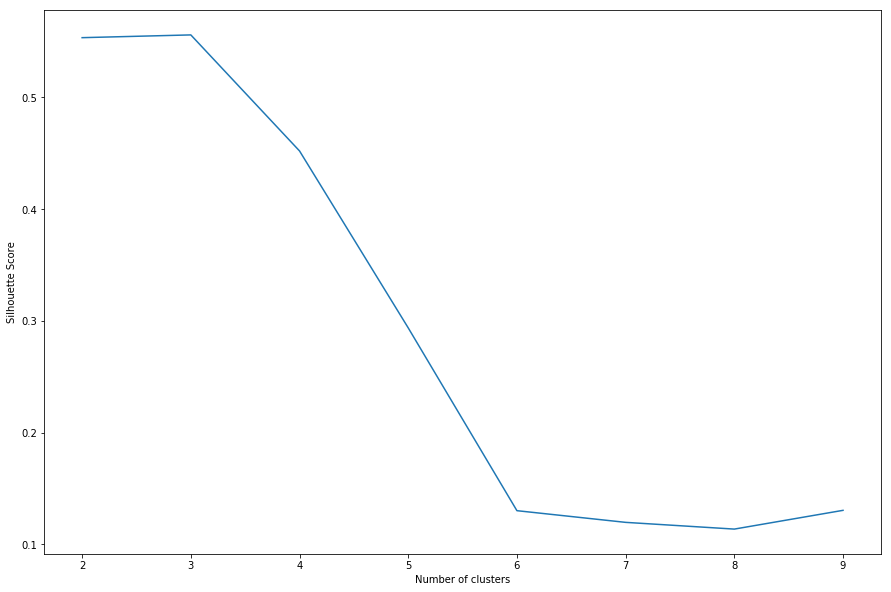

In [222]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Creating new dataframe to determine best k value by dropping first column
london_clustering = london_grouped.drop('Borough', 1)
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(15,10))
    plt.plot(np.arange(2, x), y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 10

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = london_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "Number of clusters", "Silhouette Score")

## 4. Results
>Cluster 1 has the highest neighborhood with 352 and cluster 3 is the lowest with only 1.


__Clustering Boroughs with K-means__

In [247]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

london_grouped_clustering = london_grouped.drop('Borough', 1)

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 2, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

__Creating a new dataframe which includes the cluster and the top 10 venues for each boroughs__

In [259]:
borough_venues_sorted=borough_venues_sorted.drop("Cluster Labels",axis=1)
#borough_venues_sorted.drop("Cluster Label",axis=1)
# add clustering labels
#borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [260]:
london_merged = df_loc
london_merged.head()

,Location,Borough,Post town,PostalCode,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,W3,51.51324,-0.26746
2,Acton,"Ealing, Hammersmith and Fulham",LONDON,W4,51.48944,-0.26194
3,Aldgate,City,LONDON,EC3,51.51200,-0.08058
4,Aldwych,Westminster,LONDON,WC2,51.51651,-0.11968


In [261]:
# match/merge SE London data with latitude/longitude for each neighborhood
london_merged= london_merged.join(borough_venues_sorted.set_index('Borough'), on = 'Borough',how="right")

In [262]:
london_merged

,Location,Borough,Post town,PostalCode,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127,1,Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,W3,51.51324,-0.26746,0,Pub,Café,Grocery Store,Italian Restaurant,Bakery,Bookstore,Park,Coffee Shop,Supermarket,Portuguese Restaurant
2,Acton,"Ealing, Hammersmith and Fulham",LONDON,W4,51.48944,-0.26194,0,Pub,Café,Grocery Store,Italian Restaurant,Bakery,Bookstore,Park,Coffee Shop,Supermarket,Portuguese Restaurant
3,Aldgate,City,LONDON,EC3,51.51200,-0.08058,0,Coffee Shop,Italian Restaurant,Pub,Hotel,Gym / Fitness Center,Food Truck,Wine Bar,Beer Bar,Salad Place,Restaurant
13,Barbican,City,LONDON,EC1,51.52361,-0.09877,0,Coffee Shop,Italian Restaurant,Pub,Hotel,Gym / Fitness Center,Food Truck,Wine Bar,Beer Bar,Salad Place,Restaurant
24,Blackfriars,City,LONDON,EC4,51.51389,-0.10434,0,Coffee Shop,Italian Restaurant,Pub,Hotel,Gym / Fitness Center,Food Truck,Wine Bar,Beer Bar,Salad Place,Restaurant
4,Aldwych,Westminster,LONDON,WC2,51.51651,-0.11968,0,Hotel,Coffee Shop,Café,Pub,Sandwich Place,Italian Restaurant,Theater,Restaurant,Hotel Bar,Sushi Restaurant
17,Bayswater,Westminster,LONDON,W2,51.51494,-0.18048,0,Hotel,Coffee Shop,Café,Pub,Sandwich Place,Italian Restaurant,Theater,Restaurant,Hotel Bar,Sushi Restaurant
19,Belgravia,Westminster,LONDON,SW1,51.49714,-0.13829,0,Hotel,Coffee Shop,Café,Pub,Sandwich Place,Italian Restaurant,Theater,Restaurant,Hotel Bar,Sushi Restaurant
56,Charing Cross,Westminster,LONDON,WC2,51.51651,-0.11968,0,Hotel,Coffee Shop,Café,Pub,Sandwich Place,Italian Restaurant,Theater,Restaurant,Hotel Bar,Sushi Restaurant


__Map for each cluster for visualization__


In [263]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], 
                                             london_merged['PostalCode'], london_merged['Borough'], 
                                             london_merged['Location'], london_merged['Cluster Label']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



__analysis of each cluster__

In [275]:
cluster1 = london_merged.loc[london_merged['Cluster Label'] == 0, london_merged.columns[[1] + list(range(2, london_merged.shape[1]))]]
# add location column 
cluster1['Location'] = london_merged['Location'] 
# put location column to the first column
updated_columns = [cluster1.columns[-1]] + list(cluster1.columns[:-1])
cluster1 = cluster1[updated_columns]

cluster1.shape

cluster1.head()
cluster1.loc[cluster1['1st Most Common Venue'] == "Supermarket"]

,Location,Borough,Post town,PostalCode,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Anerley,Bromley,LONDON,SE20,51.41009,-0.05683,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
77,Crystal Palace,Bromley,LONDON,SE19,51.41990,-0.08808,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
78,Crystal Palace,Bromley,LONDON,SE20,51.41009,-0.05683,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
79,Crystal Palace,Bromley,LONDON,SE26,51.42674,-0.05533,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
207,Mottingham,Bromley,LONDON,SE9,51.44463,0.05212,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place
237,Penge,Bromley,LONDON,SE20,51.41009,-0.05683,0,Supermarket,Grocery Store,Coffee Shop,Hotel,Fast Food Restaurant,Park,Convenience Store,Italian Restaurant,Gastropub,Pizza Place


In [265]:
cluster2 = london_merged.loc[london_merged['Cluster Label'] == 1, london_merged.columns[[1] + list(range(2, london_merged.shape[1]))]]
# add location column 
cluster2['Location'] = london_merged['Location'] 
# put location column to the first column
updated_columns = [cluster2.columns[-1]] + list(cluster2.columns[:-1])
cluster2 = cluster2[updated_columns]

cluster2

,Location,Borough,Post town,PostalCode,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127,1,Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
75,Crossness,Bexley,LONDON,SE2,51.49245,0.12127,1,Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market
337,West Heath,Bexley,LONDON,SE2,51.49245,0.12127,1,Supermarket,Coffee Shop,Convenience Store,Platform,Train Station,Historic Site,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market


In [266]:
cluster3 = london_merged.loc[london_merged['Cluster Label'] == 2, london_merged.columns[[1] + list(range(2, london_merged.shape[1]))]]

# add location column 
cluster3['Location'] = london_merged['Location'] 
# put location column to the first column
updated_columns = [cluster3.columns[-1]] + list(cluster3.columns[:-1])
cluster3 = cluster3[updated_columns]

cluster3

,Location,Borough,Post town,PostalCode,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
73,Cricklewood,"Barnet, Brent, Camden",LONDON,NW2,51.56237,-0.22131,2,Music Venue,Gym / Fitness Center,Supermarket,Clothing Store,Zoo Exhibit,Film Studio,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market


__Additional information four customer__: Earnings by residence and borough for London

In [210]:
path="/Users/ozgeuysal/Desktop/earnings-residence-borough.xlsx"
df_earnings = pd.read_excel(path,sheet_name="Total, Hourly")
df_earnings.sort_values("2018 hourly", axis = 0, ascending = False, 
                 inplace = True)
mean_earn=df_earnings["2018 hourly"].mean()
print(mean_earn)
df_earnings[df_earnings["2018 hourly"] >mean_earn]

16.704791666666665


,Borough,2018 hourly
0,City,27.18
46,"City, Westminster",20.83
30,Westminster,20.83
17,Kensington and Chelsea,20.04
35,Islington & City,19.73
29,Wandsworth,19.57
16,Islington,19.53
24,Richmond upon Thames,19.36
47,"Islington, Camden",19.03
40,Camden and Islington,19.03


__Additional information four customer__:population by borough

In [216]:
url2="https://www.citypopulation.de/en/uk/greaterlondon/"
data2_url=requests.get(url2).text
#parse data from the html 
df_pop, = pd.read_html(data2_url, match="Status", skiprows=None)
#delete unrelevant columns
df_pop2=df_pop.drop(["Unnamed: 7",], axis=1)


#create columns
columns_pop=["Name","Status","Population 1981", "Population 1991", "Population 2001","Population 2011", "Population 2018"]
df_pop2.columns=columns_pop
df_pop2.sort_values("Population 2018", axis = 0, ascending = False, 
                 inplace = True)
df_pop2=df_pop2[df_pop2.Name != "Greater London"]

mean_pop=df_pop2["Population 2018"].mean()
print(mean_pop)
df_pop2[df_pop2["Population 2018"] >mean_pop]
#df_pop3=df_pop3["Name","Status","Population 2018"]

269941.8484848485


,Name,Status,Population 1981,Population 1991,Population 2001,Population 2011,Population 2018
1,Barnet,Borough,295200,297700,319500,357538,392140
8,Croydon,Borough,320700,315900,335100,364815,385346
25,Newham,Borough,211900,216300,249400,310460,352005
9,Ealing,Borough,285300,283800,307300,339314,341982
10,Enfield,Borough,260900,260100,277300,313935,333869
4,Bromley,Borough,299200,293500,296200,310554,331096
3,Brent,Borough,248300,240800,269600,312245,330795
32,Wandsworth,Borough,262400,262000,271700,307710,326474
22,Lambeth,Borough,251700,255000,273400,304481,325917
30,Tower Hamlets,Borough,144700,166300,201100,256012,317705


## 5. Discussion 
* If AAA Company would like to open a supermarket in preferred address then should refer to that borough in the cluster and select the location by looking the most 10 common venue list. 
* If AAA Company would like to open a supermarket with some preferred minimum earning and population value then should look at the our population and earning lists which shows the borough with larger than the mean value of  Great London and then decide by looking our cluster analysis of the 10 most ten common venues.  



## 6. Conclusion 
>This report is based on limited data and sources and so this might be insufficient. However, even with limited data, this is an excellent beginning source to see distribution of commercials in specific area with supported by some visualizations. Moreover, the population and earning data also would be really helpful to decide since it defines your majority of the potential customers. 
